In [175]:
from mongoconnection import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dat = pd.read_csv('../data/cbd_info2.csv')

In [3]:
def lista ():
    a = dat.Effects.unique()
    b = [i.split(",") for i in a]
    z = []
    for j in b:
        for k in j:
            z.append(k)
            z = list(set(z))
            for x in z:
                if x == "None" or x=="Dry" or x=="Mouth":
                    z.remove(x)
    return z

In [4]:
filt = {"mood":{"$regex":"Happy"}}
project = {"mood":1, "product":1, "_id":0}
result = db.cbd_info.find(filt, project)
len(list(result))

1825

In [5]:
db.cbd_info.count({"mood": {"$regex": "Relaxed"}})

<ipython-input-5-b31db318e967>:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  db.cbd_info.count({"mood": {"$regex": "Relaxed"}})


1693

In [6]:
def check_exists(query, collection, *pro):
    res = read_coll(collection, query, pro)
    if len(res) > 0:
        return True
    else:
        return False

In [7]:
def convert(row):
    #print(row)
    return '<a href="{}">{}</a>'.format(row['shop'],  row.name)

In [94]:
def shop_mood(moods):
    """
    This queries one collection to another and returns a flatlist with the 
    available CBD product given the mood chosen by user
    """
    
   #querying the KAGGLE dataset
    filt = {"mood":{"$regex":f"{moods}"}}
    project = {"_id":0, "product":1}
    result = db.cbd_info.find(filt, project)
    results= list(result)
    
    #querying the SCRAPPED dataset
    lista_res = []
    for i in results:
        q = {"product":i["product"]}
        pro = {"_id":0} 
        if check_exists(q, "cbd_shops"):
            lista_res.append(read_coll("cbd_shops",q,  pro))
            flat_list = [item for sublist in lista_res for item in sublist]
            df = pd.DataFrame(flat_list)
    

                    
    return flat_list


In [176]:
def main_shop_mood(moods):
    """
    This queries one collection to another and returns a DF with the 
    available CBD product given the mood chosen by user. Without website. 
    Main DF used in streamlit
    """
    
   #querying the KAGGLE dataset
    filt = {"mood":{"$regex":f"{moods}"}}
    project = {"_id":0, "product":1}
    result = db.cbd_info.find(filt, project)
    results= list(result)
    
    #querying the SCRAPPED dataset
    lista_res = []
    for i in results:
        q = {"product":i["product"]}
        pro = {"_id":0, "shop":0} 
        if check_exists(q, "cbd_shops"):
            lista_res.append(read_coll("cbd_shops",q,  pro))
            flat_list = [item for sublist in lista_res for item in sublist]
            df = pd.DataFrame(flat_list)
    

                    
    return flat_list


In [149]:
def add_review(web, rev):
    filt = {"shop":{"$regex":f"{web}"}}
    project = {"_id":1, "product":0, "CBD percentage":0, "price":0}
    result = db.cbd_shops.find(filt, project)
    results= list(result)
    id_review = {}
    q = {"review": rev}
    results.append(q)
        
    for x in results:
           id_review.update(x)
    id_review["shop_id"] = id_review.pop("_id")
    
    return write_coll("db.cbd_product_review", id_review)




add_review("https://top-garden.net/es/flor-de-cbd/flor-de-cbd-bubblegum-4-cbd-flor-de-canamo", "wole wakamole")

In [173]:
def read_reviews(web):
    filt = {"shop":{"$regex":f"{web}"}}
    project = {"_id":0, "shop_id":0, "shop":0}
    result = db.db.cbd_product_review.find(filt, project)
    results= list(result)

    return results
    

In [174]:
read_reviews("https://top-garden.net/es/flor-de-cbd/flor-de-cbd-bubblegum-4-cbd-flor-de-canamo")

[{'review': 'wole wakamole'}]

In [142]:
#Need to make + efficient main shop mood function, something in these lines:

#def main_shop_mood(moods):
    """
    This queries one collection to another and returns a DF with the 
    available CBD product given the mood chosen by user. Without website. 
    Main DF used in streamlit
    """
    
    flat_list = shop_mood(moods)
    no_web = []
    for x in flat_list:
        for k in x:
            if k != "shop":
                no_web.append(x)
    

                    
    return no_web


IndentationError: unexpected indent (<ipython-input-142-4f11cc1a3fbd>, line 4)

In [67]:
pd.DataFrame(shop_mood("Happy")).head()

,product,CBD percentage,price,shop
0,Cashmere Leaf,5%,"24,99 €",https://top-garden.net/es/flor-de-cbd/flor-de-...
1,Amnesia,4%,"13,50 €",https://top-garden.net/es/flor-de-cbd/flor-de-...
2,Amnesia,4%,"11,49 €",https://top-garden.net/es/flor-de-cbd/flor-de-...
3,Amnesia,6%,"10,99 €",https://top-garden.net/es/flor-de-cbd/flor-de-...
4,Bubblegum,4%,"13,50 €",https://top-garden.net/es/flor-de-cbd/flor-de-...


In [31]:
def mood_description(moods):
    """
    This queries one collection to another and returns a DF with the 
    available CBD product given the mood chosen by user
    """
    flat_list = shop_mood(moods)
    lista_description = []
    for shops in flat_list:
        qu = {"product":shops["product"]}
        pro = {"_id": 0, "product":1, "description":1}
        if check_exists(qu, "cbd_info"):
                    lista_description.append( read_coll("cbd_info",qu, pro))
                    flat_list2 = [item for sublist in lista_description for item in sublist]
                    df = pd.DataFrame(flat_list2)    

    return df

In [68]:
mood_description("Happy").head()

,product,description
0,Cashmere Leaf,"Also known as Optimus Prime, the indica-domina..."
1,Amnesia,Amnesia is typically a sativa-dominant cannabi...
2,Amnesia,Amnesia is typically a sativa-dominant cannabi...
3,Amnesia,Amnesia is typically a sativa-dominant cannabi...
4,Bubblegum,An 80% indica strain from Bulldog Seeds in the...


In [10]:
def shop_ratings(moods):
    flat_list = shop_mood(moods)
    lista_ratings = []
    for ratings in flat_list:
            qu= {"product":ratings["product"]}
            pro = {"_id":0}
            if check_exists(qu, "cbd_ratings"):
                        lista_ratings.append( read_coll("cbd_ratings",qu, pro))
                        flat_list2 = [item for sublist in lista_ratings for item in sublist]
                        ratings_df = pd.DataFrame(flat_list2)
                        rate_df = ratings_df.drop_duplicates(subset="product")
                            
    return rate_df

In [69]:
shop_ratings("Happy").head()

,product,rating
0,Cashmere Leaf,4.4
1,Amnesia,4.3
4,Bubblegum,4.3
5,Purple,4.3
6,Cannatonic,4.3


In [71]:
float(4.40000)

4.4

In [161]:
def merging_shop_rating(moods):
    """
    Esta funcion me devuelve un df de df shop_ratings + shoop_moods 
    """
    df1 = pd.DataFrame(shop_mood(moods))
    df2 = shop_ratings(moods)
    #df3 = mood_description(moods)
    ttal = pd.merge(df1, df2,on='product')
    df = ttal.drop_duplicates(subset=['product','price', 'CBD percentage'], keep='last')
    return df

In [163]:
merging_shop_rating("Happy")

,product,CBD percentage,price,shop,rating
0,Cashmere Leaf,5%,"24,99 €",https://top-garden.net/es/flor-de-cbd/flor-de-...,4.4
1,Amnesia,4%,"13,50 €",https://top-garden.net/es/flor-de-cbd/flor-de-...,4.3
2,Amnesia,4%,"11,49 €",https://top-garden.net/es/flor-de-cbd/flor-de-...,4.3
3,Amnesia,6%,"10,99 €",https://top-garden.net/es/flor-de-cbd/flor-de-...,4.3
4,Bubblegum,4%,"13,50 €",https://top-garden.net/es/flor-de-cbd/flor-de-...,4.3
5,Purple,4%,"10,99 €",https://top-garden.net/es/flor-de-cbd/flor-de-...,4.3
6,Cannatonic,4%,"13,50 €",https://top-garden.net/es/flor-de-cbd/flor-de-...,4.3
7,Caramel Candy,3.5%,"11,99 €",https://top-garden.net/es/flor-de-cbd/flor-de-...,4.6
8,Cheese,4%,"13,50 €",https://top-garden.net/es/flor-de-cbd/flor-de-...,4.1
9,Candy Kush,5%,"13,50 €",https://top-garden.net/es/flor-de-cbd/flor-de-...,4.3


In [80]:
df = merging_shop_rating("Happy")
df.dtypes

product            object
CBD percentage     object
price              object
shop               object
rating            float64
description        object
dtype: object

Text(0, 0.5, 'Rating')

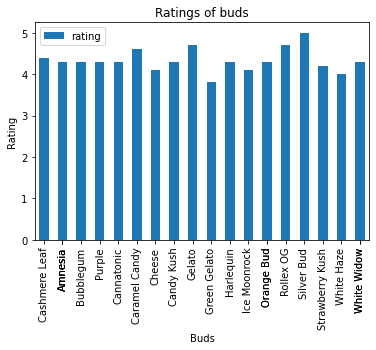

In [81]:
df = merging_shop_rating("Happy")

df.plot(kind="bar", x="product", y="rating")
plt.title("Ratings of buds")
plt.xlabel("Buds")
plt.ylabel("Rating")

In [170]:
shop_ratings("Happy")

,product,rating
0,Cashmere Leaf,4.4
1,Amnesia,4.3
2,Amnesia,4.3
3,Amnesia,4.3
4,Bubblegum,4.3
5,Purple,4.3
6,Cannatonic,4.3
7,Caramel Candy,4.6
8,Cheese,4.1
9,Candy Kush,4.3


In [158]:
rs = db.cbd_ratings.aggregate([{ "$group" : { "_id":0, "max": { "$max" : "$rating" }}}])

In [159]:
list(rs)

[{'_id': 0, 'max': 5.0}]

In [82]:
""" STACKOVERFLOW:
def findmood():
    
db.users.aggregate([{$lookup:
  {
        from: "contacts",
        localField: "number",
        foreignField: "phonenumber",
        as: "same"
    }
   },
   {
      $match: { "same": { $ne: [] } }
   }
])

"""

' STACKOVERFLOW:\ndef findmood():\n    \ndb.users.aggregate([{$lookup:\n  {\n        from: "contacts",\n        localField: "number",\n        foreignField: "phonenumber",\n        as: "same"\n    }\n   },\n   {\n      $match: { "same": { $ne: [] } }\n   }\n])\n\n'